In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("../data/train_imputed.csv")

In [3]:
df_weather_1 = pd.read_csv("../data/weather_H_75_previous-2020-2022.csv", sep=";")

In [4]:
df_weather_2 = pd.read_csv("../data/weather_H_75_latest-2023-2024.csv", sep=";")

In [5]:
df_weather_1

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010100,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010102,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010103,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010104,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156594,75116008,LONGCHAMP,48.854833,2.233667,27,2022123119,0.0,1.0,NaN,NaN,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
156595,75116008,LONGCHAMP,48.854833,2.233667,27,2022123120,0.0,1.0,NaN,NaN,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
156596,75116008,LONGCHAMP,48.854833,2.233667,27,2022123121,0.0,1.0,NaN,NaN,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
156597,75116008,LONGCHAMP,48.854833,2.233667,27,2022123122,0.0,1.0,NaN,NaN,...,0.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_weather = pd.concat([df_weather_1, df_weather_2])

In [7]:
df_weather = df_weather[df_weather["NOM_USUEL"] == "LUXEMBOURG"]

In [8]:
df_weather.drop(columns=["NUM_POSTE", "NOM_USUEL", "LAT", "ALTI"], inplace=True)

In [9]:
df_weather.drop("LON", axis=1, inplace=True)

In [10]:
df_weather = df_weather.rename(columns={"AAAAMMJJHH": "date"})

In [11]:
df_weather["date"] = pd.to_datetime(df_weather["date"], format="%Y%m%d%H")

In [12]:
df_weather.set_index("date", inplace=True)

In [13]:
df_weather

,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,QFXY,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28 23:00:00,0.2,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-29 00:00:00,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-29 01:00:00,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(df_weather["FF"].value_counts())
print(df_weather["FF"].isna().sum())

Series([], Name: count, dtype: int64)
42316


In [19]:
# Calculate the percentage of missing values for df_weather
missing_values_weather = df_weather.isnull().mean() * 100
print("\nPercentage of missing values in df_weather:")
print(missing_values_weather)


Percentage of missing values in df_weather:
RR1    0.482087
T      0.007090
TN     0.004726
TX     0.004726
DG     0.033084
dtype: float64


In [16]:
# if % of missing values is 100, drop the column

missing_cols = missing_values_weather[missing_values_weather == 100].index
df_weather.drop(missing_cols, axis=1, inplace=True)

In [20]:
df_weather

,RR1,T,TN,TX,DG
date,,,,,
2020-01-01 00:00:00,0.0,1.6,1.1,1.9,0.0
2020-01-01 01:00:00,0.0,0.9,0.9,1.7,0.0
2020-01-01 02:00:00,0.0,0.1,-0.2,0.8,44.0
2020-01-01 03:00:00,0.0,0.2,0.1,0.2,0.0
2020-01-01 04:00:00,0.0,0.6,0.2,0.6,0.0
...,...,...,...,...,...
2024-10-28 23:00:00,0.2,12.7,12.7,13.1,0.0
2024-10-29 00:00:00,0.0,12.2,12.2,12.7,0.0
2024-10-29 01:00:00,0.0,12.0,12.0,12.2,0.0


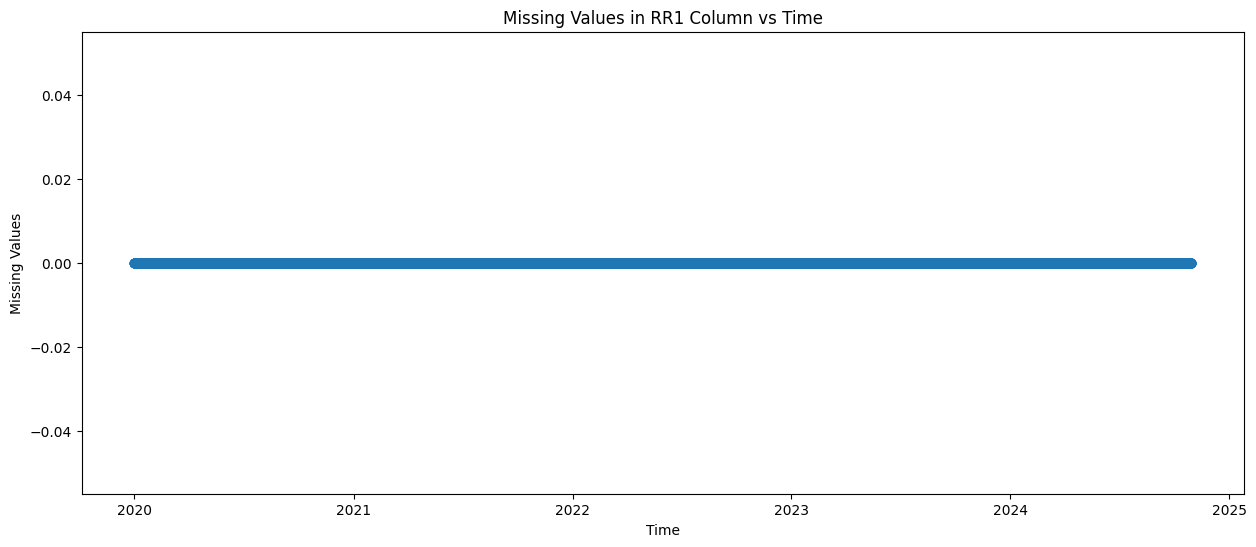

In [25]:
import matplotlib.pyplot as plt

# Plot missing values in RR1 column vs time
missing_rr1 = df_weather["RR1"].isnull()

plt.figure(figsize=(15, 6))
plt.plot(df_weather.index, missing_rr1, marker="o", linestyle="none")
plt.title("Missing Values in RR1 Column vs Time")
plt.xlabel("Time")
plt.ylabel("Missing Values")
plt.show()

In [24]:
# Filter rows where RR1 is missing
missing_rr1 = df_weather["RR1"].isna()

# Identify continuous periods of missing values
missing_periods = (missing_rr1 != missing_rr1.shift()).cumsum()
missing_ranges = (
    df_weather[missing_rr1]
    .groupby(missing_periods)
    .apply(lambda x: (x.index[0], x.index[-1]))
)

# Display missing periods
missing_ranges = missing_ranges.rename("Missing Periods").reset_index(drop=True)
print(missing_ranges)


TypeError: Index(...) must be called with a collection of some kind, 'Missing Periods' was passed

### Imputation Strategy by column

[RR1, T, TN, TX,  DG] = forward fill
[QRR1, QDRR1, QT, QTN, HTN, QHTN, , HTX, QHTX, QDG] = drop

In [18]:
df_weather.drop(
    columns=["QRR1", "QDRR1", "QT", "QTN", "HTN", "QHTN", "HTX", "QHTX", "QTX", "QDG"],
    inplace=True,
)


In [23]:
# Imputation of missing values in df_weather
# [RR1, T, TN, TX,  DG] = forward fill
# [QRR1, QDRR1, QT, QTN, HTN, QHTN, , HTX, QHTX, QDG] = drop

df_weather["RR1"].fillna(value=0, inplace=True)
df_weather["T"].fillna(method="ffill", inplace=True)
df_weather["TN"].fillna(method="ffill", inplace=True)
df_weather["TX"].fillna(method="ffill", inplace=True)
df_weather["DG"].fillna(method="ffill", inplace=True)


C:\Users\ameya\AppData\Local\Temp\ipykernel_23800\1072575435.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather["RR1"].fillna(value=0, inplace=True)
C:\Users\ameya\AppData\Local\Temp\ipykernel_23800\1072575435.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [26]:
df_weather

,RR1,T,TN,TX,DG
date,,,,,
2020-01-01 00:00:00,0.0,1.6,1.1,1.9,0.0
2020-01-01 01:00:00,0.0,0.9,0.9,1.7,0.0
2020-01-01 02:00:00,0.0,0.1,-0.2,0.8,44.0
2020-01-01 03:00:00,0.0,0.2,0.1,0.2,0.0
2020-01-01 04:00:00,0.0,0.6,0.2,0.6,0.0
...,...,...,...,...,...
2024-10-28 23:00:00,0.2,12.7,12.7,13.1,0.0
2024-10-29 00:00:00,0.0,12.2,12.2,12.7,0.0
2024-10-29 01:00:00,0.0,12.0,12.0,12.2,0.0


In [27]:
# Check for missing values in df_weather
missing_values_weather = df_weather.isnull().mean() * 100
print("\nPercentage of missing values in df_weather:")


Percentage of missing values in df_weather:


In [28]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42316 entries, 2020-01-01 00:00:00 to 2024-10-29 03:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RR1     42316 non-null  float64
 1   T       42316 non-null  float64
 2   TN      42316 non-null  float64
 3   TX      42316 non-null  float64
 4   DG      42316 non-null  float64
dtypes: float64(5)
memory usage: 2.9 MB


In [29]:
df_weather.to_csv("../data/weather_data_cleaned.csv", index=True)